### N queens puzzle to problem umieszczenia N hetmanów na szachownicy o rozmiarze N × N, tak aby żadne dwa hetmany nie atakowały siebie. W związku z tym rozwiązanie wymaga, aby żadne dwa hetmany nie znajdowały się w tym samym rzędzie, kolumnie ani po przekątnej. Rozwiązania tego problemu istnieją dla wszystkich liczb naturalnych N z wyjątkiem n = 2 i n = 3, chociaż dokładna liczba rozwiązań jest znana tylko dla N ≤ 27.

#### Problem ten można rozwiązać za pomocą algorytmu genetycznego. Szachownice rozmiaru N x N możemy zakodować jako liste, która będzie zawierała liczby 0 i 1. 0 - puste pole, 1 - pole zajęte przez hetmana. Funkcje fitness można określić na podstawie założeń problemu. Wartość funkcji fitness musi uwzględniać ilość hetmanów na szachownicy oraz to czy hetmany atakują siebie wzajemnie. Ilosć hetmanów na szachownicy N x N musi wynosić dokładnie N zatem dobrym pomysłem jest przyjęcie wzoru:

$
\begin{equation}
\large fitness = |n_{queens} - n|
\end{equation}
$

$
n_{queens} - ilość \, hetmanów \, na \, szachownicy \\
n - docelowa \, ilość \, hetmanów \\
$

#### Uwzględnia on sytuację, w której jest za dużo hetmanów na szachownicy jak i sytuację, w której jest ich za mało. Aby wartość funkcji fitness uwzględniała wszystkiego założenia problemu do powyższego wzoru trzeba dodać ilość atakujących siebie hetmanów. 

$
\begin{equation}
\large fitness = |n_{queens} - n| + n_{queens_{atc}}
\end{equation}
$

$
n_{queens} - ilość \, hetmanów \, na \, szachownicy \\
n - docelowa \, ilość \, hetmanów \\
n_{queens_{atc}} - ilość \, atakujących \, siebie \, hetmanów \\
$

In [115]:
import numpy as np
import pygad
import math
import matplotlib.pyplot as plt
import time
import pandas as pd

In [100]:
def plot_chessboard(solution):
    n = int(math.sqrt(len(solution)))
    solution = solution.reshape(n, n)
    for i in range(n):
        for j in range(n):
            if solution[i][j] == 0:
                sign = 'X'
            else:
                sign = 'Q' 
            if j+1 < n:
                print(sign, end = ' ')
            else:
                print(sign, end = '\n')
    
def get_queens_indexes(solution):
    n = solution.shape[0]
    indexes = []
    for y in range(n):
        for x in range(n):
            if solution[y][x] == 1:
                indexes.append([y,x])
    return indexes
    
def check_vertically(solution, y, x):
    penalty = 0
    n = solution.shape[0]
    for i in range(n):
        if i != y and solution[i][x] == 1:
            penalty += 1
    return penalty
    
def check_horizontally(solution, y, x):
    penalty = 0
    n = solution.shape[0]
    for i in range(n):
        if i != x and solution[y][i] == 1:
            penalty += 1
    return penalty

def check_diagonally(solution, y, x):
    penalty = 0
    step = 1
    x_idx = x
    y_idx = y
    n = solution.shape[0]
    while(x_idx != 0 and y_idx < n-1):
        x_idx = x - step
        y_idx = y + step
        if solution[y_idx][x_idx] == 1:
            penalty += 1
        step += 1
    
    step = 1
    x_idx = x
    y_idx = y
    while(x_idx != 0 and y_idx != 0):
        x_idx = x - step
        y_idx = y - step
        if solution[y_idx][x_idx] == 1:
            penalty += 1
        step += 1
    
    step = 1
    x_idx = x
    y_idx = y
    while(x_idx < n-1 and y_idx != 0):
        x_idx = x + step
        y_idx = y - step
        if solution[y_idx][x_idx] == 1:
            penalty += 1
        step += 1
    
    step = 1
    x_idx = x
    y_idx = y
    while(x_idx < n-1 and y_idx < n-1):
        x_idx = x + step
        y_idx = y + step
        if solution[y_idx][x_idx] == 1:
            penalty += 1
        step += 1
        
    return penalty
    
def fitness_func(solution, solution_idx):
    n = int(math.sqrt(len(solution)))
    n_queens = np.count_nonzero(solution)
    solution = solution.reshape((n, n))
    fitness = abs(n_queens - n)
    indexes = get_queens_indexes(solution)
    
    for i in range(len(indexes)):
        penalty_v = check_vertically(solution, indexes[i][0], indexes[i][1])
        penalty_h = check_horizontally(solution, indexes[i][0], indexes[i][1])
        penalty_d = check_diagonally(solution, indexes[i][0], indexes[i][1])
        fitness += penalty_v + penalty_h + penalty_d
        
    return -fitness

def weighted_fitness_function(solution, solution_idx):
    n = int(math.sqrt(len(solution)))
    n_queens = np.count_nonzero(solution)
    solution = solution.reshape((n, n))
    
    if n_queens < n:
        fitness = (n - n_queens) * 3
    else:
        fitness = n_queens - n
        
    indexes = get_queens_indexes(solution)
    
    for i in range(len(indexes)):
        penalty_v = check_vertically(solution, indexes[i][0], indexes[i][1])
        penalty_h = check_horizontally(solution, indexes[i][0], indexes[i][1])
        penalty_d = check_diagonally(solution, indexes[i][0], indexes[i][1])
        fitness += penalty_v + penalty_h + penalty_d
        
    return -fitness
    
def find_solution(n, sol_per_pop, num_parents_mating, num_generations, keep_parents, mutation_percent_genes, fit):
    if fit == 1:
        function = fitness_func
    else:
        function = weighted_fitness_function
    gene_space = [0, 1]
    num_genes = n*n
    parent_selection_type = "sss"
    crossover_type = "single_point"
    mutation_type = "random"
    ga_instance = pygad.GA(gene_space=gene_space,
                    num_generations=num_generations,
                    num_parents_mating=num_parents_mating,
                    fitness_func=function,
                    sol_per_pop=sol_per_pop,
                    num_genes=num_genes,
                    parent_selection_type=parent_selection_type,
                    keep_parents=keep_parents,
                    crossover_type=crossover_type,
                    mutation_type=mutation_type,
                    mutation_percent_genes=mutation_percent_genes,
                    stop_criteria='reach_0')
    
    ga_instance.run()
    solution, solution_fitness, solution_idx = ga_instance.best_solution()
    print("Parameters of the best solution : {solution}".format(solution=solution))
    print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
    ga_instance.plot_fitness()
    plot_chessboard(solution)

def solution_fitness(n, sol_per_pop, num_parents_mating, num_generations, keep_parents, mutation_percent_genes, fit):
    gene_space = [0, 1]
    num_genes = n*n
    parent_selection_type = "sss"
    crossover_type = "single_point"
    mutation_type = "random"
    if fit == 1:
        function = fitness_func
    else:
        function = weighted_fitness_function
    ga_instance = pygad.GA(gene_space=gene_space,
                    num_generations=num_generations,
                    num_parents_mating=num_parents_mating,
                    fitness_func=function,
                    sol_per_pop=sol_per_pop,
                    num_genes=num_genes,
                    parent_selection_type=parent_selection_type,
                    keep_parents=keep_parents,
                    crossover_type=crossover_type,
                    mutation_type=mutation_type,
                    mutation_percent_genes=mutation_percent_genes,
                    stop_criteria='reach_0')
    ga_instance.run()
    solution, solution_fitness, solution_idx = ga_instance.best_solution()
    return solution_fitness

#### W funkcji 'fitness_func' zakodowany chromosom jest przekształcany z 1D na 2D, tak aby wygodniej było sprawdzać poszczególne indeksy. Następnie określana jest wstępna wartość kary - zmienna fitness - na podstawie przyjętego wcześniej wzoru. Aby określić ostateczną wartość kary, rozstawione na szachownicy hetmany są sprawdzane pod kątem założeń problemu. Kara jest naliczana kiedy dwa hetmany są w tej samej kolumnie, wierszu bądź na tej samej przekątnej. Na koniec wartości kar są sumowane dając ostateczną wartość.

Parameters of the best solution : [1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
Fitness value of the best solution = -1


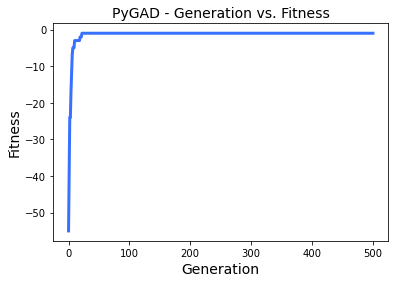

Q X X X X X
X X Q X X X
X X X X X Q
X Q X X X X
X X X X X X
X X X X Q X


In [12]:
find_solution(6, 60, 40, 500, 5, 5, fit = 1)

Parameters of the best solution : [0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0.]
Fitness value of the best solution = 0


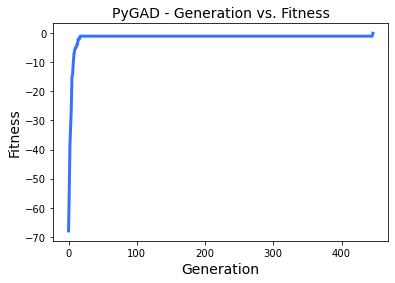

X X X Q X X
Q X X X X X
X X X X Q X
X Q X X X X
X X X X X Q
X X Q X X X


In [13]:
find_solution(6, 100, 60, 500, 6, 3, fit = 1)

Parameters of the best solution : [0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
Fitness value of the best solution = 0


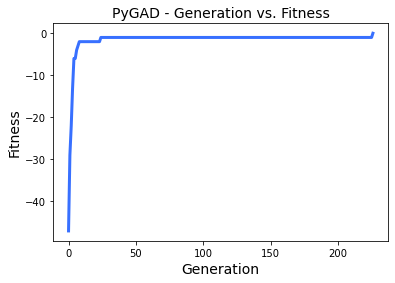

X Q X X X X
X X X Q X X
X X X X X Q
Q X X X X X
X X Q X X X
X X X X Q X


In [14]:
find_solution(6, 200, 100, 500, 10, 2, fit = 1)

Parameters of the best solution : [0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0.]
Fitness value of the best solution = 0


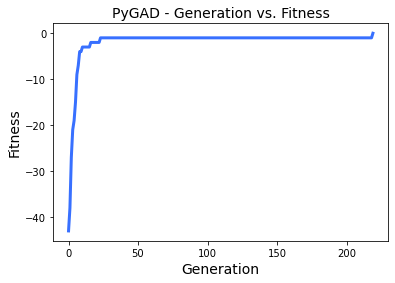

X X X Q X X
Q X X X X X
X X X X Q X
X Q X X X X
X X X X X Q
X X Q X X X


In [16]:
find_solution(6, 60, 40, 500, 5, 1.5, fit = 1)

Parameters of the best solution : [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
Fitness value of the best solution = -1


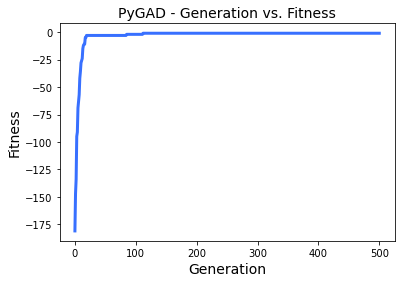

X X X X X X X X
X X X X Q X X X
X Q X X X X X X
X X X X X X X Q
Q X X X X X X X
X X X Q X X X X
X X X X X X Q X
X X Q X X X X X


In [17]:
find_solution(8, 80, 40, 500, 5, 2, fit = 1)

Parameters of the best solution : [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
Fitness value of the best solution = -1


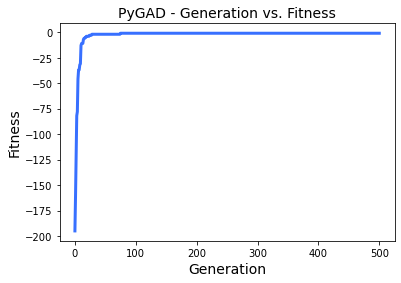

X X X X X X X X
X Q X X X X X X
X X X X X X Q X
X X X X Q X X X
X X X X X X X Q
Q X X X X X X X
X X X Q X X X X
X X X X X Q X X


In [18]:
find_solution(8, 200, 100, 500, 8, 1.5, fit = 1)

Parameters of the best solution : [0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
Fitness value of the best solution = -1


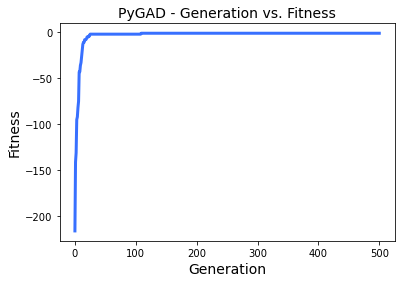

X X X X X X X Q
Q X X X X X X X
X X X Q X X X X
X X X X X X Q X
X X X X Q X X X
X Q X X X X X X
X X X X X X X X
X X X X X Q X X


In [19]:
find_solution(8, 80, 40, 500, 5, 1.5, fit = 1)

In [68]:
fitness_values_low_mutation = []
fitness_values_high_mutation = []

for i in range(50):
    fitness_values_low_mutation.append(solution_fitness(8, 80, 40, 500, 5, 1.5, fit = 1))
    fitness_values_high_mutation.append(solution_fitness(8, 80, 40, 500, 5, 3, fit = 1))

C:\Users\pstrz\anaconda3\lib\site-packages\pygad\pygad.py:522: UserWarning: The percentage of genes to mutate (mutation_percent_genes=1.5) resutled in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  if not self.suppress_warnings: warnings.warn("The percentage of genes to mutate (mutation_percent_genes={mutation_percent}) resutled in selecting ({mutation_num}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.".format(mutation_percent=mutation_percent_genes, mutation_num=mutation_num_genes))


Text(0.5, 1.0, 'High mutation percent')

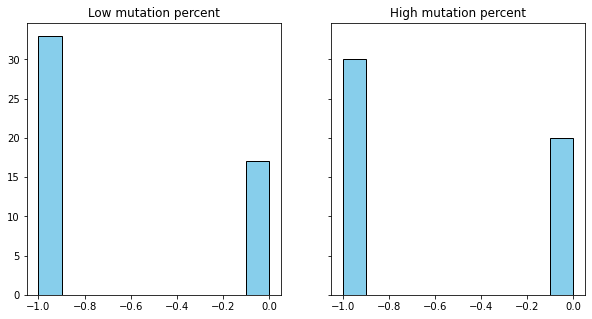

In [69]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey = True, figsize = (10,5))
ax1.hist(fitness_values_low_mutation, color = 'skyblue', edgecolor = 'black')
ax1.set_title('Low mutation percent')
ax2.hist(fitness_values_high_mutation, color = 'skyblue', edgecolor = 'black')
ax2.set_title('High mutation percent')
plt.show()

#### Po kilku eksperymentach można zauważyć, że algorytm lepiej reaguje na większy współczynnik mutacji. O wiele częściej algorytm znajdywał rozwiązanie dla większego współczynnika mutacji - ok. 3. Wielkość populacji nie musi być duża - brak znaczących różnić względem 2x mniejszej populacji. Do rozmnażania wyłaniane jest ok. 50% populacji oraz zachowywane kilka procent rodziców ok. 10%. 

Parameters of the best solution : [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 1. 0. 0. 0. 0. 0. 0. 0.]
Fitness value of the best solution = -2


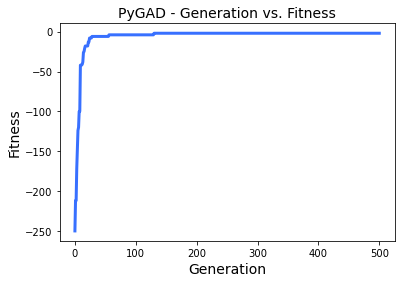

X X X X X X X X X
X X X X Q X X X X
Q X X X X X X X X
X X X X X X X Q X
X X X X X X X X X
X X Q X X X X X X
X X X X X X Q X X
X X X X X X X X Q
X Q X X X X X X X


In [22]:
find_solution(9, 100, 60, 500, 6, 3, fit = 1)

Parameters of the best solution : [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
Fitness value of the best solution = -1


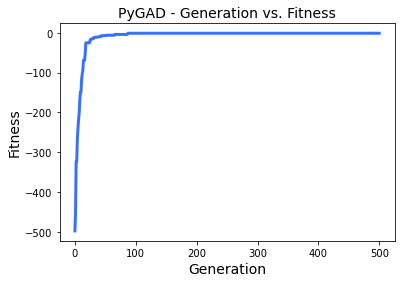

X X X Q X X X X X X
X X X X X X Q X X X
X X X X X X X X X Q
X X Q X X X X X X X
X X X X X X X X X X
X X X X X Q X X X X
X X X X X X X Q X X
X Q X X X X X X X X
X X X X Q X X X X X
Q X X X X X X X X X


In [23]:
find_solution(10, 200, 100, 500, 10, 2, fit = 1)

Parameters of the best solution : [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Fitness value of the best solution = -5


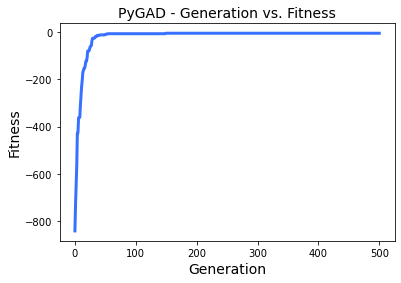

X X X X X X X X Q X X X
X X X X X Q X X X X Q X
X X X Q X X X X X X X X
X X X X X X X X X X X X
X X X X X X X X X Q X X
X X X X X X X X X X X X
X X X X X X Q X X X X X
X X Q X X X X X X X X X
X X X X X X X Q X X X X
X Q X X X X X X X X X X
X X X X X X X X X X X X
X X X X X X X X X X X X


In [24]:
find_solution(12, 200, 120, 500, 12, 2, fit = 1)

Parameters of the best solution : [0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0.]
Fitness value of the best solution = -45


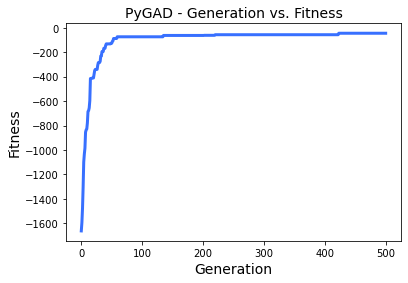

X X X Q X X X X Q X X X X X X
X X X X X X X X X X X Q X X X
X X X X X X X Q Q Q X X X X X
X X X X X X X X X X X X X X X
X X X X X X X X Q X X X X X X
X X X X X X Q X X X X X X X X
Q Q X X X X X X X X X X X X X
Q X X X X X X Q X X X X X X X
X X X X X X X X X X X X X Q X
X X X X X X X X X X X X X X X
X X X X X X X X X X X X Q X X
X X X X X X X X X X X X X X X
X X X Q X X X X X X X Q X X X
X X X X X X X X X X X Q X X X
X X X X X X Q X X X X X X X X


In [25]:
find_solution(15, 300, 200, 500, 15, 2, fit = 1)

In [102]:
def ga_efficiency(n, n_sample, mutation_percent_genes, fit):
    times = []
    values = []
    for i in range(n_sample):
        sol_per_pop = int(n*10)
        num_parents_mating = int(sol_per_pop/2)
        keep_parent = n

        start = time.time()
        values.append(solution_fitness(n, sol_per_pop, num_parents_mating, 500, keep_parent, mutation_percent_genes, fit))
        end = time.time()
        times.append(end - start)
    return (values, times)

In [103]:
def ga_efficiency_plot(values, times, title):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10,5))
    fig.suptitle(title)

    unique_values = np.unique(values)
    counts = []

    for value in unique_values:
        counts.append(values.count(value))

    ax1.bar(unique_values, counts, color = 'skyblue', edgecolor = 'black')
    ax1.set_title('Fitness values')

    ax2.hist(times, color = 'skyblue', edgecolor = 'black')
    ax2.set_title('Times')

    plt.show()

In [104]:
accuracy = []
mean_times = []

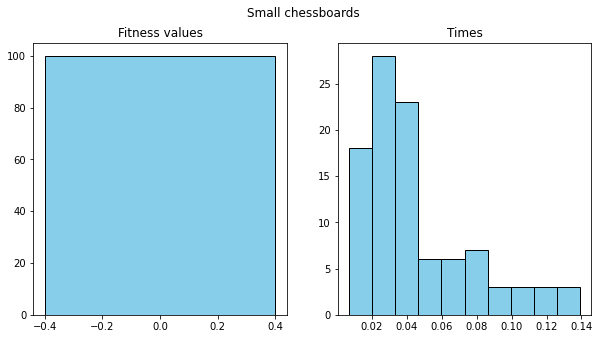

Średni czas:  0.045916266441345215
Procent idealnych rozwiązań:  100 %


In [105]:
values, times = ga_efficiency(4, 100, 2, 1)

ga_efficiency_plot(values, times, 'Small chessboards')

print('Średni czas: ', np.mean(times))
print('Procent idealnych rozwiązań: ', values.count(0), '%')

accuracy.append(values.count(0))
mean_times.append(np.mean(times))

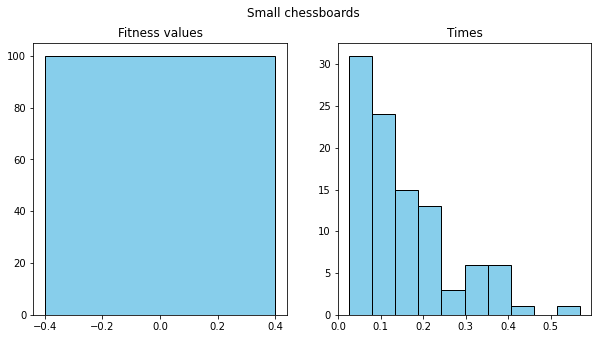

Średni czas:  0.15464455127716065
Procent idealnych rozwiązań:  100 %


In [106]:
values, times = ga_efficiency(5, 100, 2, 1)

ga_efficiency_plot(values, times, 'Small chessboards')

print('Średni czas: ', np.mean(times))
print('Procent idealnych rozwiązań: ', values.count(0), '%')

accuracy.append(values.count(0))
mean_times.append(np.mean(times))

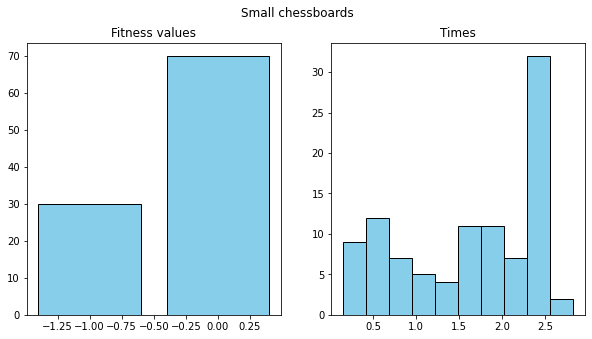

Średni czas:  1.6161056447029114
Procent idealnych rozwiązań:  70 %


In [107]:
values, times = ga_efficiency(6, 100, 2, 1)

ga_efficiency_plot(values, times, 'Small chessboards')

print('Średni czas: ', np.mean(times))
print('Procent idealnych rozwiązań: ', values.count(0), '%')

accuracy.append(values.count(0))
mean_times.append(np.mean(times))

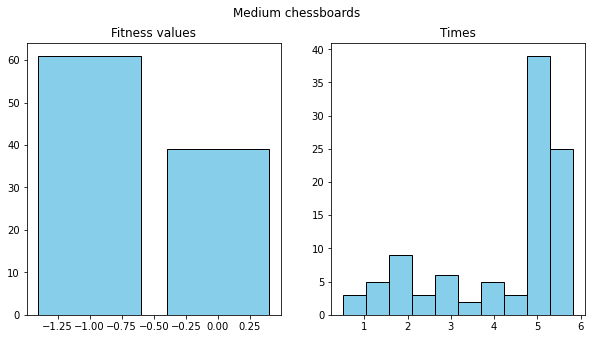

Średni czas:  4.28451144695282
Procent idealnych rozwiązań:  39 %


In [108]:
values, times = ga_efficiency(8, 100, 2, 1)

ga_efficiency_plot(values, times, 'Medium chessboards')

print('Średni czas: ', np.mean(times))
print('Procent idealnych rozwiązań: ', values.count(0), '%')

accuracy.append(values.count(0))
mean_times.append(np.mean(times))

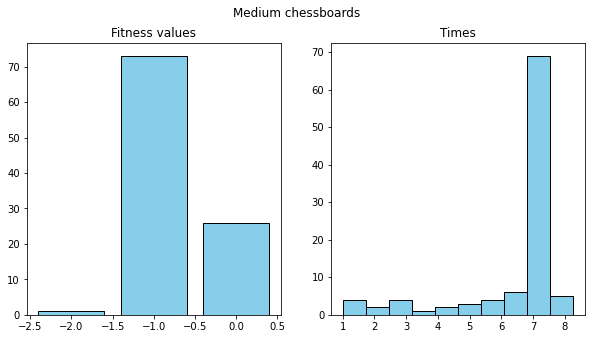

Średni czas:  6.3601561808586125
Procent idealnych rozwiązań:  26 %


In [109]:
values, times = ga_efficiency(9, 100, 2, 1)

ga_efficiency_plot(values, times, 'Medium chessboards')

print('Średni czas: ', np.mean(times))
print('Procent idealnych rozwiązań: ', values.count(0), '%')

accuracy.append(values.count(0))
mean_times.append(np.mean(times))

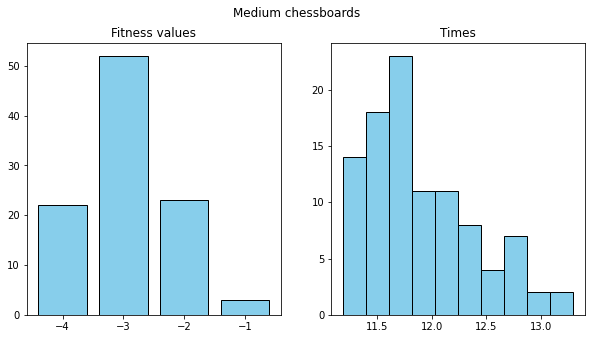

Średni czas:  11.905573132038116
Procent idealnych rozwiązań:  0 %


In [110]:
values, times = ga_efficiency(10, 100, 2, 1)

ga_efficiency_plot(values, times, 'Medium chessboards')

print('Średni czas: ', np.mean(times))
print('Procent idealnych rozwiązań: ', values.count(0), '%')

accuracy.append(values.count(0))
mean_times.append(np.mean(times))

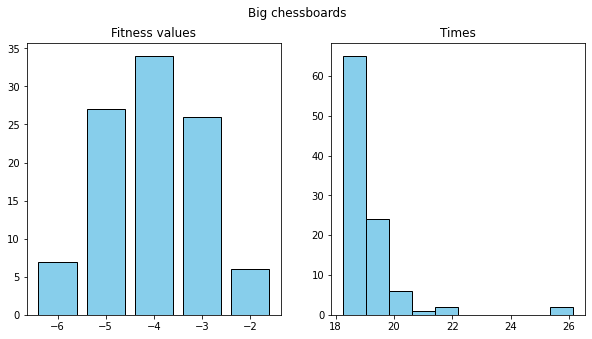

Średni czas:  19.19707841873169
Procent idealnych rozwiązań:  0 %


In [111]:
values, times = ga_efficiency(12, 100, 2, 1)

ga_efficiency_plot(values, times, 'Big chessboards')

print('Średni czas: ', np.mean(times))
print('Procent idealnych rozwiązań: ', values.count(0), '%')

accuracy.append(values.count(0))
mean_times.append(np.mean(times))

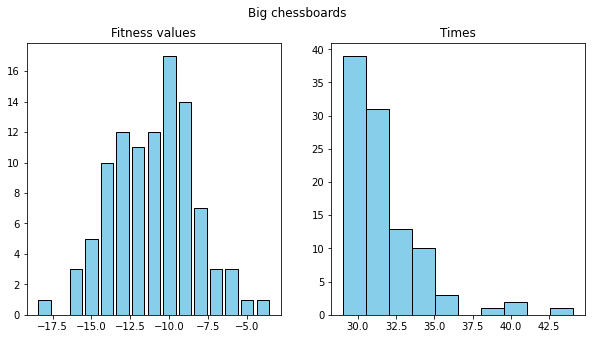

Średni czas:  31.753448436260225
Procent idealnych rozwiązań:  0 %


In [112]:
values, times = ga_efficiency(13, 100, 2, 1)

ga_efficiency_plot(values, times, 'Big chessboards')

print('Średni czas: ', np.mean(times))
print('Procent idealnych rozwiązań: ', values.count(0), '%')

accuracy.append(values.count(0))
mean_times.append(np.mean(times))

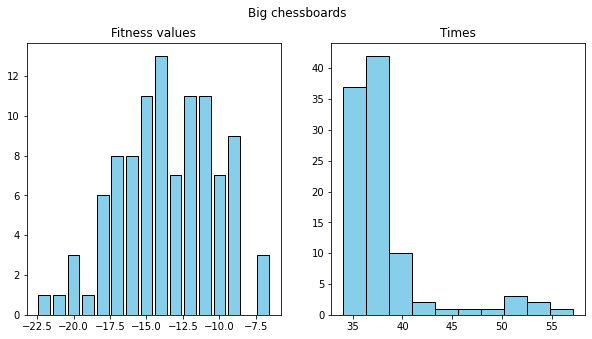

Średni czas:  38.125978684425355
Procent idealnych rozwiązań:  0 %


In [113]:
values, times = ga_efficiency(14, 100, 2, 1)

ga_efficiency_plot(values, times, 'Big chessboards')

print('Średni czas: ', np.mean(times))
print('Procent idealnych rozwiązań: ', values.count(0), '%')

accuracy.append(values.count(0))
mean_times.append(np.mean(times))

In [116]:
size = [4,5,6,8,9,10,12,13,14]

summary = pd.DataFrame({'N': size, 'Dokładność': accuracy, 'Średni czas': mean_times})
summary

,N,Dokładność,Średni czas
0,4,100,0.045916
1,5,100,0.154645
2,6,70,1.616106
3,8,39,4.284511
4,9,26,6.360156
5,10,0,11.905573
6,12,0,19.197078
7,13,0,31.753448
8,14,0,38.125979


#### Algorytm genetyczny rozwiązuje ten problem dosyć dobrze dla małych N. Dla N > 8 funkcja fitness wiele razy zwraca wartość -1, -2 - ilość hetmanów rozstawionych na szachownicy nie wynosi wtedy dokładnie N dla szachownicy rozmiaru N x N. Wartość funkcji fitness jest zmniejszana o X w przypadku gdy jest o X za dużo hetmanów jak i w sytuacji, w której jest X za mało rozstawionych hetmanów. Można więc spróbować poprawić funkcję fitness tak aby odejmowane było więcej punktów gdy rozstawionych jest za mało hetmanów.

\begin{equation}
  fitness =
    \begin{cases}
      n_{queens} - n & \text{$n_{queens}$ $\geq$ n}\\
      (n - n_{queens}) \cdot 3 & \text{$n_{queens}$ < n}\\
    \end{cases}       
\end{equation}

Parameters of the best solution : [0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
Fitness value of the best solution = 0


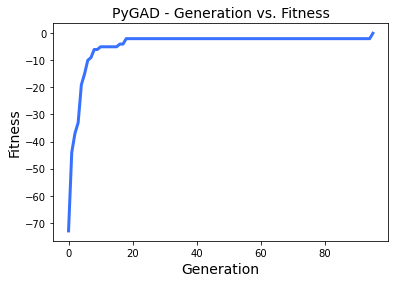

X Q X X X X
X X X Q X X
X X X X X Q
Q X X X X X
X X Q X X X
X X X X Q X


In [26]:
find_solution(6, 60, 40, 500, 6, 2, fit = 2)

Parameters of the best solution : [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
Fitness value of the best solution = 0


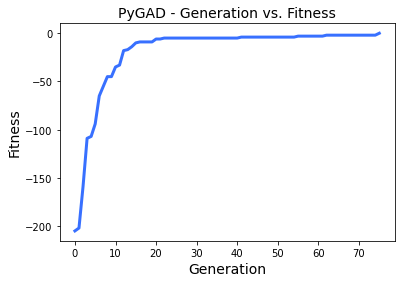

X X Q X X X X X
X X X X Q X X X
X X X X X X X Q
X X X Q X X X X
Q X X X X X X X
X X X X X X Q X
X Q X X X X X X
X X X X X Q X X


In [27]:
find_solution(8, 80, 50, 500, 8, 2, fit = 2)

In [73]:
fitness_values = []

for i in range(50):
    fitness_values.append(solution_fitness(8, 80, 50, 500, 8, 2, fit = 2))

(array([23.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 27.]),
 array([-2. , -1.8, -1.6, -1.4, -1.2, -1. , -0.8, -0.6, -0.4, -0.2,  0. ]),
 <BarContainer object of 10 artists>)

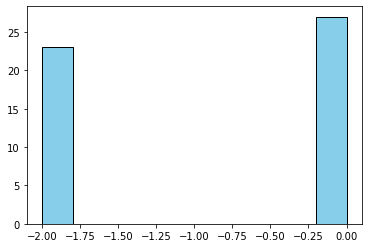

In [75]:
plt.hist(fitness_values, color = 'skyblue', edgecolor = 'black')
plt.show()

In [74]:
fitness_values.count(0)

27

Parameters of the best solution : [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0.]
Fitness value of the best solution = 0


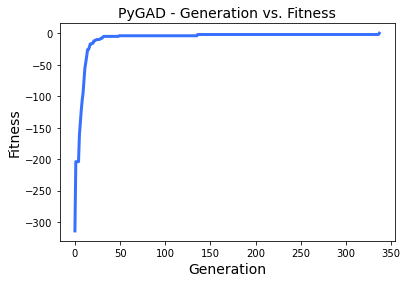

X X X X X X X Q X
X X X X Q X X X X
X X Q X X X X X X
Q X X X X X X X X
X X X X X Q X X X
X Q X X X X X X X
X X X X X X X X Q
X X X X X X Q X X
X X X Q X X X X X


In [28]:
find_solution(9, 90, 60, 500, 10, 2, fit = 2)

Parameters of the best solution : [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0.]
Fitness value of the best solution = -4


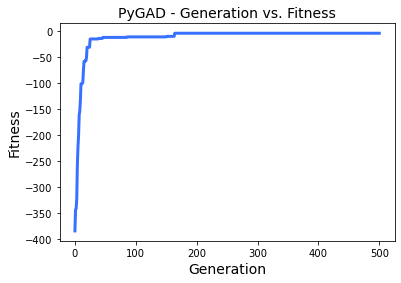

X X X X X X X Q X X
X X X X X X X X X Q
X X Q X X X X X X X
X X X X X X X X Q X
X X X X X Q X X X X
X X X X X X X X X Q
Q X X X X X X X X X
X X X X X X Q X X X
X X X X Q X X X X X
X X X X X X Q X X X


In [41]:
find_solution(10, 100, 60, 500, 10, 2, fit = 2)

Parameters of the best solution : [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
Fitness value of the best solution = -6


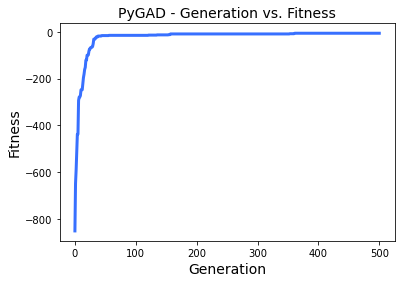

X X X X X X X X X Q X X
X X Q X X X X X X X X X
X X X X Q X X X X X X X
X X X X X X X Q X X X X
Q X X X X X X X X X X X
X X X Q X X X X X X X X
X X X X X X X X X X X Q
X X X X X X Q X X X X X
X X X X X X X X Q X X X
X X X X X Q X X X X X X
X Q X X X X X X X X X X
X X X X X X X X X X X Q


In [39]:
find_solution(12, 120, 70, 500, 10, 2, fit = 2)

Parameters of the best solution : [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Fitness value of the best solution = -59


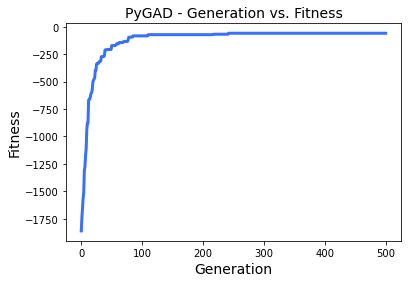

X X X X X X X X X X X X X Q X
X X X X X X X X X X Q X Q X X
X X X X X X X X X X X X Q X X
X X X X X X X X X X X X X X X
X X X X X Q X X X X X X X X Q
Q X X X X X X X X X X X X X X
Q Q X X X X Q X X X X X X X X
X X X X X X Q X X X X X X X X
X X X X X X X X X X X Q X X X
X X X X X X Q X X X X X X X X
X X X X X X X X Q X X Q X X X
X X X Q X X X X X X X X X X X
X X X X X Q X X X X X X X X X
X Q X X X X X X X Q X X X X X
X X X X Q X X X X X X X X X X


In [49]:
find_solution(15, 150, 80, 500, 10, 2, fit = 2)

#### W pierwszym przypadku bardzo często występowały ustawienia, w których brakowało jednego hetmana, ale nie było dla niego dobrego pola. Wartość funkcji fitness po dostawieniu wyniosła by -2 z racji atakowania siebie wzajemnie dwóch hetmanów, dlatego lepszym rozwiązaniem było pominięcie jednej figury i otrzymanie wartości funkcji fitness -1. Z tego powodu wyższy współczynnik mutacji był lepszy, ponieważ dawał większą szansę na zupełnie nowe rozwiązanie.

#### Dla małych N widać poprawę, algorytm genetyczny znalazł rozwiązania więcej razy niż wcześniej. Niestety dla dużych N nie widać poprawy. Na takie wyniki może mieć wpływ zbyt duży współczynnik mutacji. Wcześniej dawał on lepsze rezultaty z racji innej funkcji fitness. Po dodaniu wag nie trzeba się martwić o zbyt małą ilość rozstawionych hetmanów, a o znalezienie właściwego ustawienia figur na szachownicy. Duży współczynnik mutacji może wprowadzać zbyt duże zmiany w chromosomach. Warto więc sprawdzić działanie algorytmu z niższym współczynnikiem mutacji.

Parameters of the best solution : [0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0.]
Fitness value of the best solution = 0


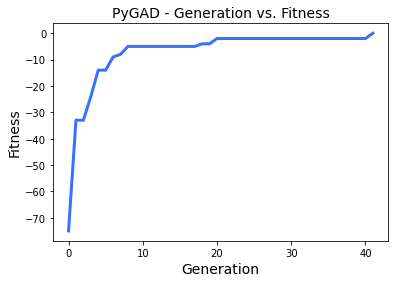

X X X X Q X
X X Q X X X
Q X X X X X
X X X X X Q
X X X Q X X
X Q X X X X


In [50]:
find_solution(6, 60, 40, 500, 6, 1.5, fit = 2)

Parameters of the best solution : [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
Fitness value of the best solution = 0


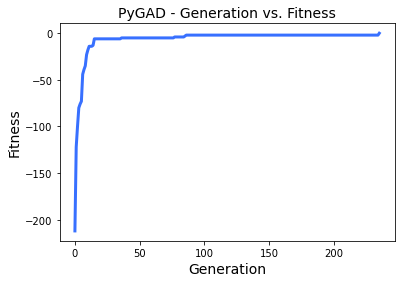

X Q X X X X X X
X X X X X Q X X
X X X X X X X Q
X X Q X X X X X
Q X X X X X X X
X X X Q X X X X
X X X X X X Q X
X X X X Q X X X


In [54]:
find_solution(8, 80, 50, 500, 8, 1.5, fit = 2)

Parameters of the best solution : [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0.]
Fitness value of the best solution = 0


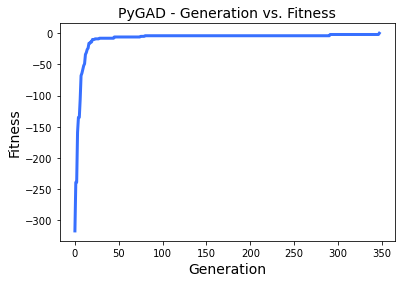

X X X X Q X X X X
X X Q X X X X X X
X X X X X Q X X X
X X X X X X X X Q
X X X X X X Q X X
X Q X X X X X X X
X X X Q X X X X X
X X X X X X X Q X
Q X X X X X X X X


In [74]:
find_solution(9, 90, 60, 500, 9, 1.5, fit = 2)

Parameters of the best solution : [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0.]
Fitness value of the best solution = 0


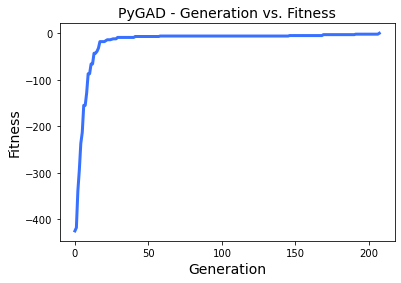

X X X X X X X X Q X
X X Q X X X X X X X
Q X X X X X X X X X
X X X X X X Q X X X
X X X X X X X X X Q
X X X X X Q X X X X
X Q X X X X X X X X
X X X X Q X X X X X
X X X X X X X Q X X
X X X Q X X X X X X


In [63]:
find_solution(10, 150, 80, 500, 8, 1.25, fit = 2)

Parameters of the best solution : [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
Fitness value of the best solution = -2


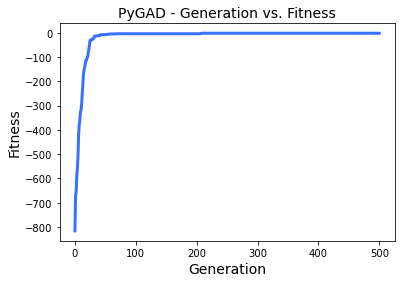

X X Q X X X X X X X X X
X X X X X X X Q X X X X
X X X X X X X X X X Q X
Q X X X X X X X X X X X
X X X X X X X X X Q X X
X Q X X X X Q X X X X X
X X X X Q X X X X X X X
X X X X X X X X X X X Q
X X X X X X X X Q X X X
X X X X X X X X X X X X
X X X X X Q X X X X X X
X X X Q X X X X X X X X


In [73]:
find_solution(12, 300, 200, 500, 20, 1.25, fit = 2)

Parameters of the best solution : [0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Fitness value of the best solution = -11


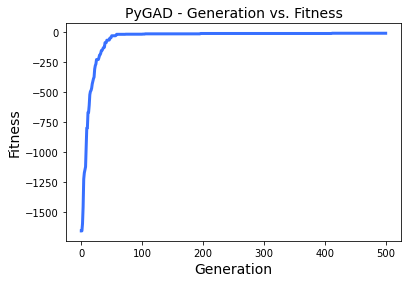

X X X X X Q X X Q X X X X X X
X Q X X X X X X X X X X X X X
X X X X X X X X X X X Q X X X
X X X X X X X X X X X X X X X
Q X X X X X X X X X X X X X X
X X X X X X X X X X X X Q X X
X X X X X X X X X X Q X X X X
X X X X X X X Q X X X X X X X
X X X X X X X X X X X X X X Q
X X Q X X X X X X X X X X X X
X X X X X X X X X Q X Q X X X
X X X X X X X X X X X X X Q X
X X X X X X X X X X X X X X X
X X X X X X X X X X X X X X X
X X X X Q X X X X X X X X X X


In [72]:
find_solution(15, 300, 200, 500, 20, 1.25, fit = 2)

In [117]:
accuracy2 = []
mean_times2 = []

C:\Users\pstrz\anaconda3\lib\site-packages\pygad\pygad.py:522: UserWarning: The percentage of genes to mutate (mutation_percent_genes=1.5) resutled in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  if not self.suppress_warnings: warnings.warn("The percentage of genes to mutate (mutation_percent_genes={mutation_percent}) resutled in selecting ({mutation_num}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.".format(mutation_percent=mutation_percent_genes, mutation_num=mutation_num_genes))


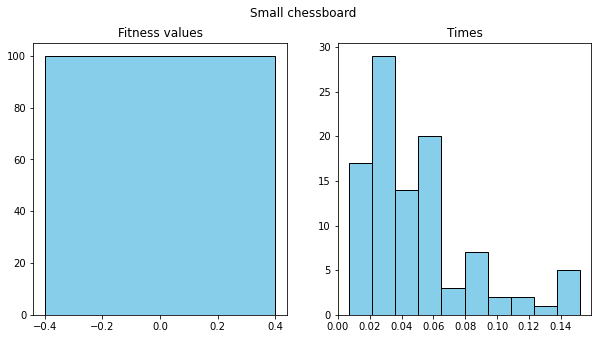

Średni czas:  0.04940915584564209
Procent idealnych rozwiązań:  100 %


In [118]:
values, times = ga_efficiency(4, 100, 1.5, 2)

ga_efficiency_plot(values, times, 'Small chessboard')

print('Średni czas: ', np.mean(times))
print('Procent idealnych rozwiązań: ', values.count(0), '%')

accuracy2.append(values.count(0))
mean_times2.append(np.mean(times))

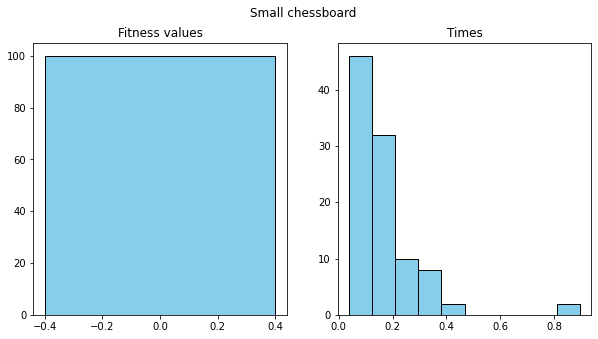

Średni czas:  0.1624017333984375
Procent idealnych rozwiązań:  100 %


In [119]:
values, times = ga_efficiency(5, 100, 1.5, 2)

ga_efficiency_plot(values, times, 'Small chessboard')

print('Średni czas: ', np.mean(times))
print('Procent idealnych rozwiązań: ', values.count(0), '%')

accuracy2.append(values.count(0))
mean_times2.append(np.mean(times))

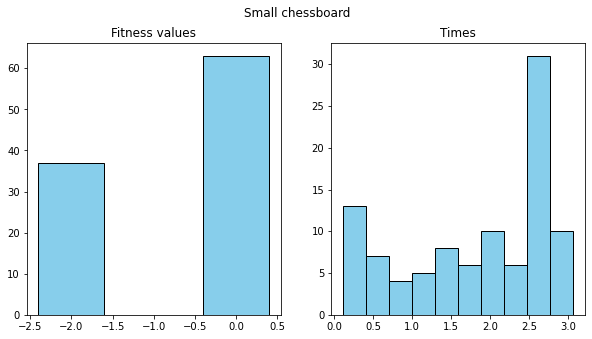

Średni czas:  1.825705168247223
Procent idealnych rozwiązań:  63 %


In [120]:
values, times = ga_efficiency(6, 100, 1.5, 2)

ga_efficiency_plot(values, times, 'Small chessboard')

print('Średni czas: ', np.mean(times))
print('Procent idealnych rozwiązań: ', values.count(0), '%')

accuracy2.append(values.count(0))
mean_times2.append(np.mean(times))

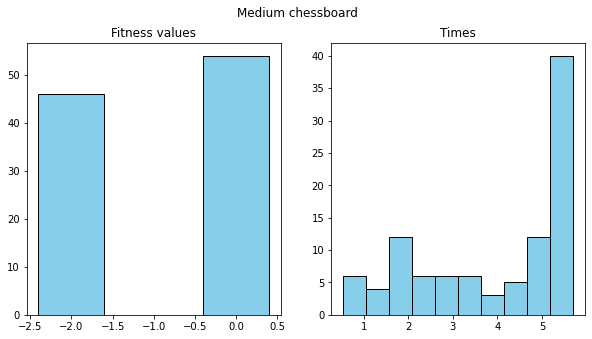

Średni czas:  3.8924163675308225
Procent idealnych rozwiązań:  54 %


In [121]:
values, times = ga_efficiency(8, 100, 1.5, 2)

ga_efficiency_plot(values, times, 'Medium chessboard')

print('Średni czas: ', np.mean(times))
print('Procent idealnych rozwiązań: ', values.count(0), '%')

accuracy2.append(values.count(0))
mean_times2.append(np.mean(times))

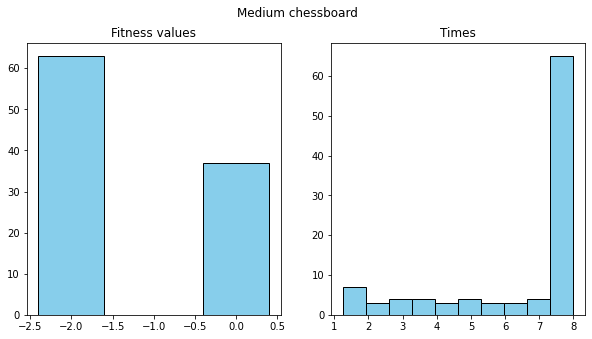

Średni czas:  6.2500552821159365
Procent idealnych rozwiązań:  37 %


In [122]:
values, times = ga_efficiency(9, 100, 1.5, 2)

ga_efficiency_plot(values, times, 'Medium chessboard')

print('Średni czas: ', np.mean(times))
print('Procent idealnych rozwiązań: ', values.count(0), '%')

accuracy2.append(values.count(0))
mean_times2.append(np.mean(times))

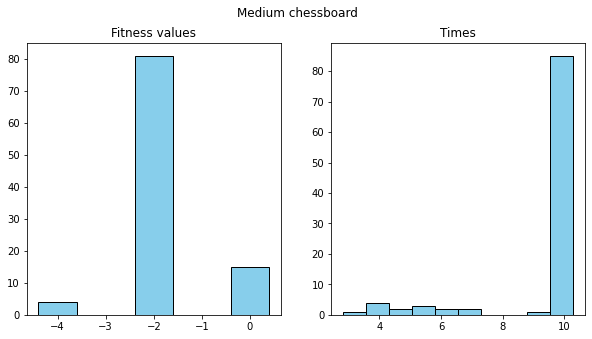

Średni czas:  9.243758962154388
Procent idealnych rozwiązań:  15 %


In [123]:
values, times = ga_efficiency(10, 100, 1.5, 2)

ga_efficiency_plot(values, times, 'Medium chessboard')

print('Średni czas: ', np.mean(times))
print('Procent idealnych rozwiązań: ', values.count(0), '%')

accuracy2.append(values.count(0))
mean_times2.append(np.mean(times))

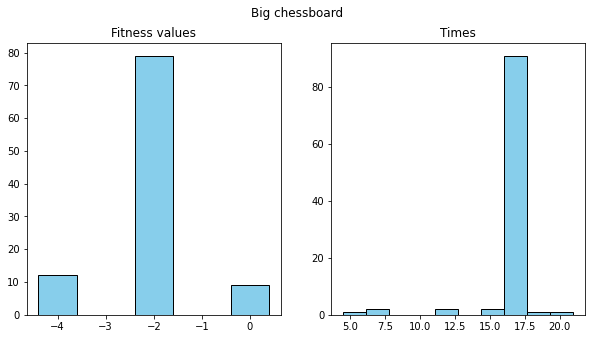

Średni czas:  16.39016968011856
Procent idealnych rozwiązań:  9 %


In [124]:
values, times = ga_efficiency(12, 100, 1.25, 2)

ga_efficiency_plot(values, times, 'Big chessboard')

print('Średni czas: ', np.mean(times))
print('Procent idealnych rozwiązań: ', values.count(0), '%')

accuracy2.append(values.count(0))
mean_times2.append(np.mean(times))

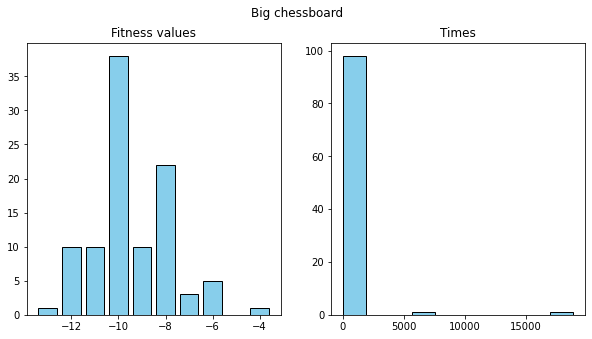

Średni czas:  276.90364197254183
Procent idealnych rozwiązań:  0 %


In [125]:
values, times = ga_efficiency(13, 100, 1.25, 2)

ga_efficiency_plot(values, times, 'Big chessboard')

print('Średni czas: ', np.mean(times))
print('Procent idealnych rozwiązań: ', values.count(0), '%')

accuracy2.append(values.count(0))
mean_times2.append(np.mean(times))

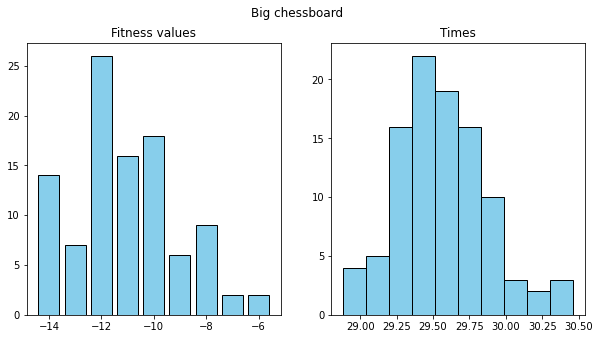

Średni czas:  29.565099544525147
Procent idealnych rozwiązań:  0 %


In [126]:
values, times = ga_efficiency(14, 100, 1.25, 2)

ga_efficiency_plot(values, times, 'Big chessboard')

print('Średni czas: ', np.mean(times))
print('Procent idealnych rozwiązań: ', values.count(0), '%')

accuracy2.append(values.count(0))
mean_times2.append(np.mean(times))

In [127]:
summary2 = pd.DataFrame({'N': size, 'Dokładność': accuracy2, 'Średni czas': mean_times2})
summary2

,N,Dokładność,Średni czas
0,4,100,0.049409
1,5,100,0.162402
2,6,63,1.825705
3,8,54,3.892416
4,9,37,6.250055
5,10,15,9.243759
6,12,9,16.390170
7,13,0,276.903642
8,14,0,29.565100


#### Po wprowadzonych zmianach algorytm genetyczny radzi sobie trochę lepiej niż wcześniej. Dokładność rozwiązań zwiększyła się o parę punktów procenotwych. Średni czas znalezienia rozwiązania zmniejszył się w każdym przypadku. Wcześniejsze podejście do tego problemu nie potrafiło znaleźć rozwiązania dla N > 10, a teraz udało się również ustawić 12 hetmanów na planszy tak aby się nie atakowały. Mimo braku rozwiązań dla większych N, funkcja fitness zwraca o wiele lepsze wartości niż wcześniej.

#### Wyżej przedstawione podejścia do rozwiązania tego problemu nie są za bardzo optymalne. Generowanie chromosomów długości N * N jest słabym pomysłem, ponieważ problem da się uprościć. Pola jakie pokrywa jeden hetman to między innymi cała kolumna i wiersz, zatem każdy hetman musi znajdować się w innej kolumnie i wierszu. Można więc uprościć chromosom do długości N przyjmując, że każdy hetman jest w innej kolumnie i znaleźć dla każdego hetmana odpowiedni wiersz tak aby się nie atakowały. Takie rozwiązanie jest o wiele prostsze i można je zakodować przyjmując: 

$
$num_genes = N$ \\
$gene_space = [0, ..., N-1]$ \\
$

#### Zaletą takiego rozwiązania jest również otrzymywanie za każdym razem dokładnej ilości rozstawionych hetmanów na szachownicy.

In [144]:
def reproduce_chessboard(queen_indexes):
    n = len(queen_indexes)
    chess_board = []
    for i in np.arange(0, n, 1, dtype = int):
        row = []
        for j in np.arange(0, n, 1, dtype = int):
            if([i,j] in queen_indexes):
                row.append(1)
            else:
                row.append(0)
        chess_board.append(row)
    return np.array(chess_board, dtype = int)

def get_queen_indexes(solution):
    n = len(solution)
    queen_indexes = []
    solution = np.array(solution, dtype = int)
    
    for i in np.arange(0, n, 1, dtype = int):
        queen_indexes.append([i, solution[i]])
    
    return queen_indexes
    
def plot_chessboard(solution):
    solution - np.array(solution, dtype = int)
    queen_indexes = get_queen_indexes(solution)
    chess_board = reproduce_chessboard(queen_indexes)
    n = chess_board.shape[0]
    for i in range(n):
        for j in range(n):
            if chess_board[i][j] == 0:
                sign = 'X'
            else:
                sign = 'Q' 
            if j+1 < n:
                print(sign, end = ' ')
            else:
                print(sign, end = '\n')
    
def fitness_function(solution, solution_idx):
    solution = np.array(solution, dtype = int)
    n = len(solution)
    indexes = get_queen_indexes(solution)
    
    solution = reproduce_chessboard(indexes)
    
    fitness = 0
    for j in range(len(indexes)):
        penalty_v = check_vertically(solution, indexes[j][0], indexes[j][1])
        penalty_h = check_horizontally(solution, indexes[j][0], indexes[j][1])
        penalty_d = check_diagonally(solution, indexes[j][0], indexes[j][1])
        fitness += penalty_v + penalty_h + penalty_d
        
    return -fitness

def find_solution2(n, sol_per_pop, num_parents_mating, num_generations, keep_parents, mutation_percent_genes):
    gene_space = np.arange(0, n, 1, dtype = int)
    num_genes = n
    parent_selection_type = "sss"
    crossover_type = "single_point"
    mutation_type = "random"
    ga_instance = pygad.GA(gene_space=gene_space,
                    num_generations=num_generations,
                    num_parents_mating=num_parents_mating,
                    fitness_func=fitness_function,
                    sol_per_pop=sol_per_pop,
                    num_genes=num_genes,
                    parent_selection_type=parent_selection_type,
                    keep_parents=keep_parents,
                    crossover_type=crossover_type,
                    mutation_type=mutation_type,
                    mutation_percent_genes=mutation_percent_genes,
                    stop_criteria='reach_0')
    
    ga_instance.run()
    solution, solution_fitness, solution_idx = ga_instance.best_solution()
    print("Parameters of the best solution : {solution}".format(solution=solution))
    print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
    ga_instance.plot_fitness()
    plot_chessboard(solution)

def solution_fitness2(n, sol_per_pop, num_parents_mating, num_generations, keep_parents, mutation_percent_genes):
    gene_space = np.arange(0, n, 1, dtype = int)
    num_genes = n
    parent_selection_type = "sss"
    crossover_type = "single_point"
    mutation_type = "random"
    ga_instance = pygad.GA(gene_space=gene_space,
                    num_generations=num_generations,
                    num_parents_mating=num_parents_mating,
                    fitness_func=fitness_function,
                    sol_per_pop=sol_per_pop,
                    num_genes=num_genes,
                    parent_selection_type=parent_selection_type,
                    keep_parents=keep_parents,
                    crossover_type=crossover_type,
                    mutation_type=mutation_type,
                    mutation_percent_genes=mutation_percent_genes,
                    stop_criteria='reach_0')
    ga_instance.run()
    solution, solution_fitness, solution_idx = ga_instance.best_solution()
    return solution_fitness

Parameters of the best solution : [2. 7. 3. 6. 0. 5. 1. 4.]
Fitness value of the best solution = 0


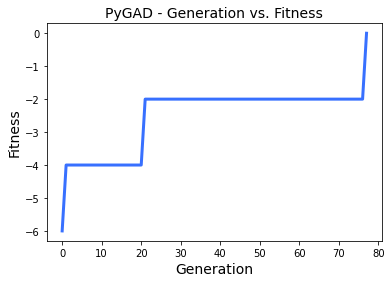

X X Q X X X X X
X X X X X X X Q
X X X Q X X X X
X X X X X X Q X
Q X X X X X X X
X X X X X Q X X
X Q X X X X X X
X X X X Q X X X


In [85]:
find_solution2(8, 80, 40, 500, 8, 2)

Parameters of the best solution : [10.  5.  2. 11.  1.  4.  7.  9.  0.  3.  8.  6.]
Fitness value of the best solution = 0


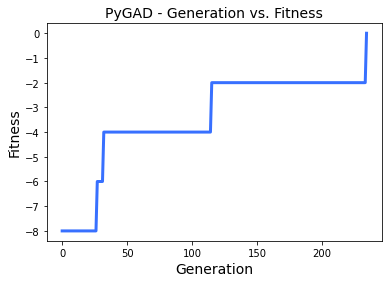

X X X X X X X X X X Q X
X X X X X Q X X X X X X
X X Q X X X X X X X X X
X X X X X X X X X X X Q
X Q X X X X X X X X X X
X X X X Q X X X X X X X
X X X X X X X Q X X X X
X X X X X X X X X Q X X
Q X X X X X X X X X X X
X X X Q X X X X X X X X
X X X X X X X X Q X X X
X X X X X X Q X X X X X


In [112]:
find_solution2(12, 120, 60, 500, 12, 2)

Parameters of the best solution : [11.  5.  7.  1. 10.  2. 13.  8.  0. 12.  3.  6. 14.  9.  4.]
Fitness value of the best solution = 0


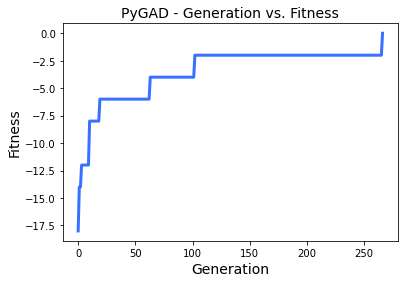

X X X X X X X X X X X Q X X X
X X X X X Q X X X X X X X X X
X X X X X X X Q X X X X X X X
X Q X X X X X X X X X X X X X
X X X X X X X X X X Q X X X X
X X Q X X X X X X X X X X X X
X X X X X X X X X X X X X Q X
X X X X X X X X Q X X X X X X
Q X X X X X X X X X X X X X X
X X X X X X X X X X X X Q X X
X X X Q X X X X X X X X X X X
X X X X X X Q X X X X X X X X
X X X X X X X X X X X X X X Q
X X X X X X X X X Q X X X X X
X X X X Q X X X X X X X X X X


In [83]:
find_solution2(15, 150, 75, 500, 15, 1.5)

#### Przyjęty wcześniej sposób dobierania współczynników dalej się sprawdza. Procent mutacji musi być niski ze względu na duże uproszcznie chromosomów. Duży współczynnik mutacji mógłby generować dużo anomiali.

In [129]:
def ga_efficiency_2(n, n_sample, mutation_percent_genes):
    times = []
    values = []
    for i in range(n_sample):
        sol_per_pop = int(n*10)
        num_parents_mating = int(sol_per_pop/2)
        keep_parent = n

        start = time.time()
        values.append(solution_fitness2(n, sol_per_pop, num_parents_mating, 500, keep_parent, mutation_percent_genes))
        end = time.time()
        times.append(end - start)
    return (values, times)

In [130]:
accuracy3 = []
mean_times3 = []

C:\Users\pstrz\anaconda3\lib\site-packages\pygad\pygad.py:522: UserWarning: The percentage of genes to mutate (mutation_percent_genes=1.5) resutled in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  if not self.suppress_warnings: warnings.warn("The percentage of genes to mutate (mutation_percent_genes={mutation_percent}) resutled in selecting ({mutation_num}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.".format(mutation_percent=mutation_percent_genes, mutation_num=mutation_num_genes))


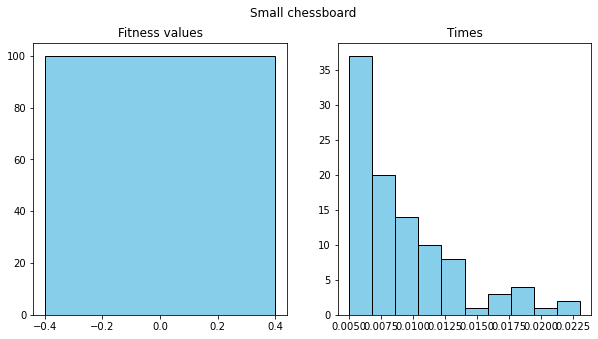

Średni czas:  0.009230787754058839
Procent idealnych rozwiązań:  100 %


In [131]:
values, times = ga_efficiency_2(4, 100, 1.5)

ga_efficiency_plot(values, times, 'Small chessboard')

print('Średni czas: ', np.mean(times))
print('Procent idealnych rozwiązań: ', values.count(0), '%')

accuracy3.append(values.count(0))
mean_times3.append(np.mean(times))

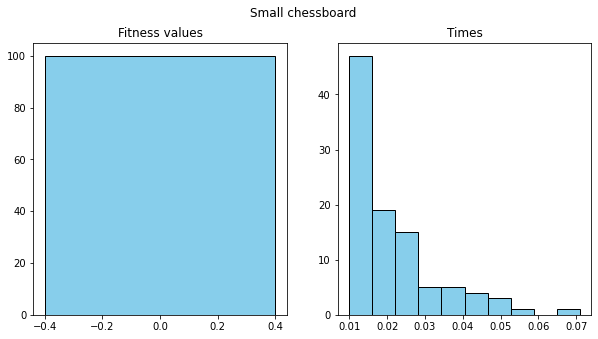

Średni czas:  0.02120875358581543
Procent idealnych rozwiązań:  100 %


In [132]:
values, times = ga_efficiency_2(5, 100, 1.5)

ga_efficiency_plot(values, times, 'Small chessboard')

print('Średni czas: ', np.mean(times))
print('Procent idealnych rozwiązań: ', values.count(0), '%')

accuracy3.append(values.count(0))
mean_times3.append(np.mean(times))

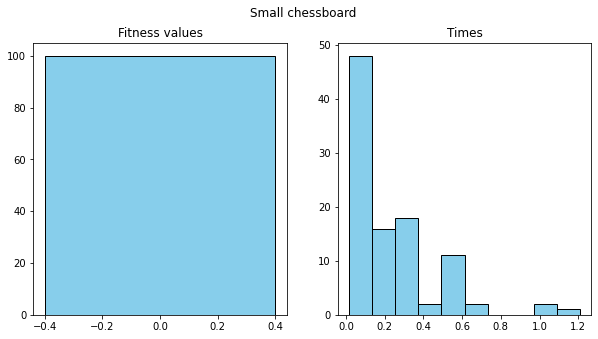

Średni czas:  0.23705877542495726
Procent idealnych rozwiązań:  100 %


In [133]:
values, times = ga_efficiency_2(6, 100, 1.5)

ga_efficiency_plot(values, times, 'Small chessboard')

print('Średni czas: ', np.mean(times))
print('Procent idealnych rozwiązań: ', values.count(0), '%')

accuracy3.append(values.count(0))
mean_times3.append(np.mean(times))

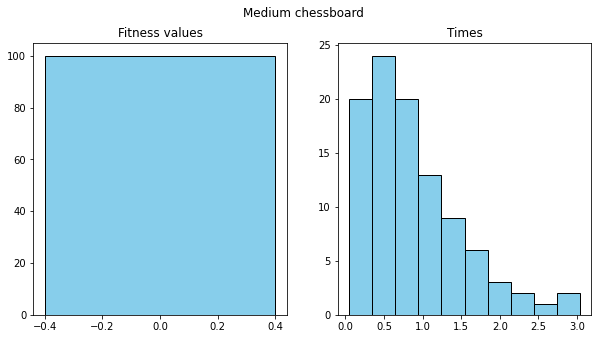

Średni czas:  0.8801067662239075
Procent idealnych rozwiązań:  100 %


In [134]:
values, times = ga_efficiency_2(8, 100, 1.5)

ga_efficiency_plot(values, times, 'Medium chessboard')

print('Średni czas: ', np.mean(times))
print('Procent idealnych rozwiązań: ', values.count(0), '%')

accuracy3.append(values.count(0))
mean_times3.append(np.mean(times))

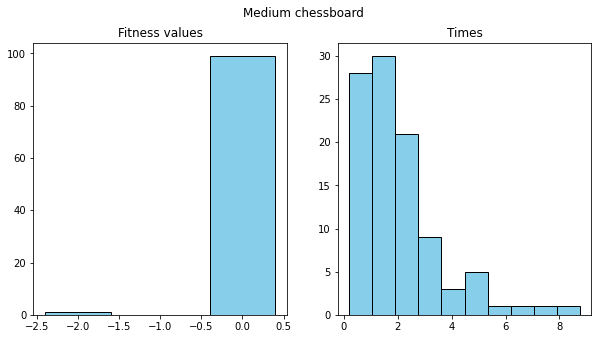

Średni czas:  2.0389122200012206
Procent idealnych rozwiązań:  99 %


In [135]:
values, times = ga_efficiency_2(9, 100, 1.5)

ga_efficiency_plot(values, times, 'Medium chessboard')

print('Średni czas: ', np.mean(times))
print('Procent idealnych rozwiązań: ', values.count(0), '%')

accuracy3.append(values.count(0))
mean_times3.append(np.mean(times))

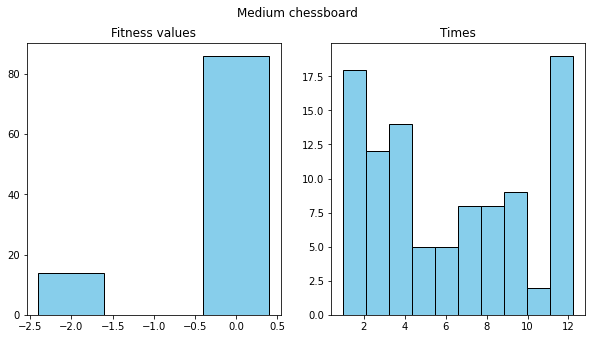

Średni czas:  6.280475640296936
Procent idealnych rozwiązań:  86 %


In [136]:
values, times = ga_efficiency_2(10, 100, 1.5)

ga_efficiency_plot(values, times, 'Medium chessboard')

print('Średni czas: ', np.mean(times))
print('Procent idealnych rozwiązań: ', values.count(0), '%')

accuracy3.append(values.count(0))
mean_times3.append(np.mean(times))

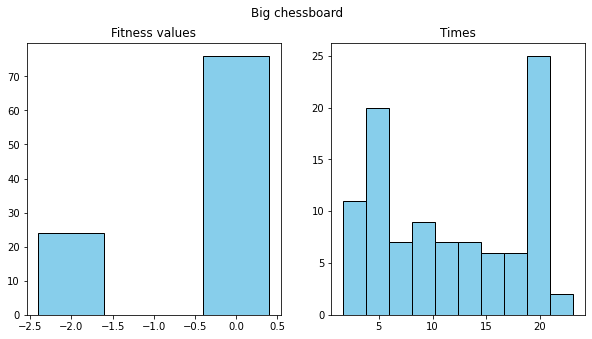

Średni czas:  11.670733728408813
Procent idealnych rozwiązań:  76 %


In [137]:
values, times = ga_efficiency_2(12, 100, 1.5)

ga_efficiency_plot(values, times, 'Big chessboard')

print('Średni czas: ', np.mean(times))
print('Procent idealnych rozwiązań: ', values.count(0), '%')

accuracy3.append(values.count(0))
mean_times3.append(np.mean(times))

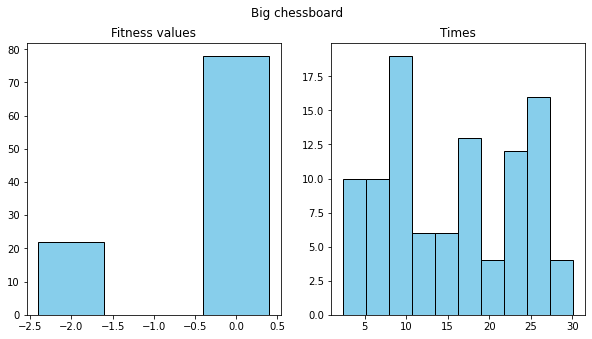

Średni czas:  15.5162877202034
Procent idealnych rozwiązań:  78 %


In [138]:
values, times = ga_efficiency_2(13, 100, 1.5)

ga_efficiency_plot(values, times, 'Big chessboard')

print('Średni czas: ', np.mean(times))
print('Procent idealnych rozwiązań: ', values.count(0), '%')

accuracy3.append(values.count(0))
mean_times3.append(np.mean(times))

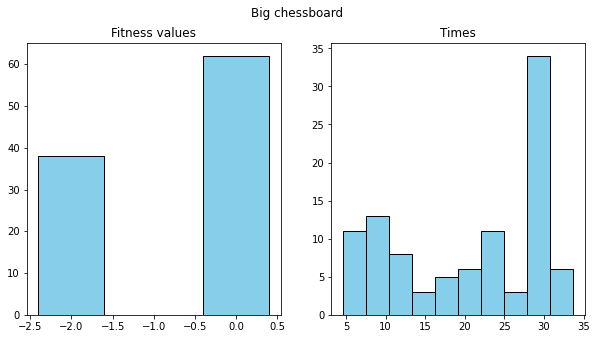

Średni czas:  20.89838981628418
Procent idealnych rozwiązań:  62 %


In [139]:
values, times = ga_efficiency_2(14, 100, 1.5)

ga_efficiency_plot(values, times, 'Big chessboard')

print('Średni czas: ', np.mean(times))
print('Procent idealnych rozwiązań: ', values.count(0), '%')

accuracy3.append(values.count(0))
mean_times3.append(np.mean(times))

In [143]:
summary3 = pd.DataFrame({'N': size, 'Dokładność': accuracy3, 'Średni czas': mean_times3})
summary3

,N,Dokładność,Średni czas
0,4,100,0.009231
1,5,100,0.021209
2,6,100,0.237059
3,8,100,0.880107
4,9,99,2.038912
5,10,86,6.280476
6,12,76,11.670734
7,13,78,15.516288
8,14,62,20.898390


#### To podejście jest znacznie lepsze od wcześniejszych. Przez redukcję rozmiaru chromosomu średnie czasy rozwiązań mocno spadły. Znacznie poprawiły się dokładności. Nawet dla dużych N dokładność jest całkiem wysoka. Takie podejście do rozwiązania tego problemu jest bardzo optymalne.

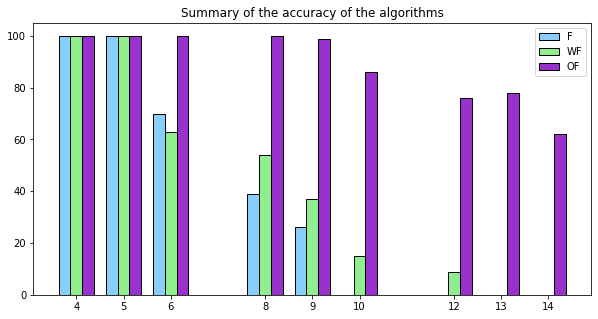

In [162]:
x = [4,5,6,8,9,10,12,13,14]

x1 = list(map(lambda n: n - 0.25, x))
x2 = list(map(lambda n: n + 0.25, x))

plt.figure(figsize = (10,5))
plt.bar(x1, accuracy, width = 0.25, label = 'F', color = 'lightskyblue', edgecolor = 'black')
plt.bar(x, accuracy2, width = 0.25, label = 'WF', color = 'lightgreen', edgecolor = 'black')
plt.bar(x2, accuracy3, width = 0.25, label = 'OF', color = 'darkorchid', edgecolor = 'black')
plt.xticks(x)
plt.title('Summary of the accuracy of the algorithms')
plt.legend()
plt.show()

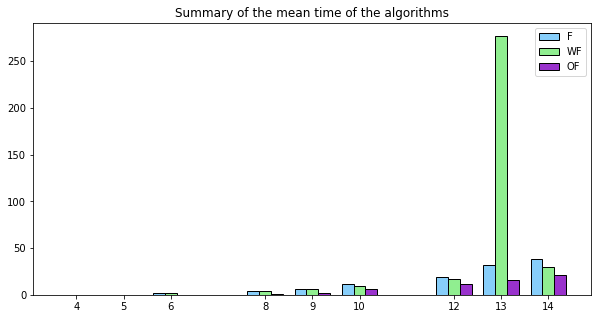

In [163]:
plt.figure(figsize = (10,5))
plt.bar(x1, mean_times, width = 0.25, label = 'F', color = 'lightskyblue', edgecolor = 'black')
plt.bar(x, mean_times2, width = 0.25, label = 'WF', color = 'lightgreen', edgecolor = 'black')
plt.bar(x2, mean_times3, width = 0.25, label = 'OF', color = 'darkorchid', edgecolor = 'black')
plt.xticks(x)
plt.title('Summary of the mean time of the algorithms')
plt.legend()
plt.show()

#### Algorytm genetyczny rozwiązuje problem 'N queens puzzle'. W zależności od przyjętych parametrów oraz zdefiniowania funkcji fitness otrzymamy różne wyniki. Najlepiej sprawdził się sposób z przyjęciem założenia o występowaniu każdego hetmana w innej kolumnie. Takie uproszczenie umozliwiło zredukowanie rozmiaru chromosomu co przyczyniło się na lepsze wyniki. Zarówno dokładności jak i czasy na wszystkich testowanych rozmiarach plansz wypadły o wiele lepiej. Bardzo dobrze obrazują to powyższe wykresy.

Parameters of the best solution : [ 3.  1. 17. 15. 12.  6.  8.  2.  4. 13. 16. 18. 11.  7. 19.  0.  9. 14.
 10.  5.]
Fitness value of the best solution = 0


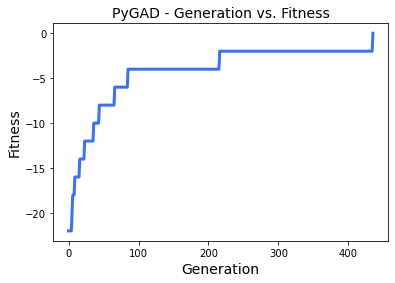

X X X Q X X X X X X X X X X X X X X X X
X Q X X X X X X X X X X X X X X X X X X
X X X X X X X X X X X X X X X X X Q X X
X X X X X X X X X X X X X X X Q X X X X
X X X X X X X X X X X X Q X X X X X X X
X X X X X X Q X X X X X X X X X X X X X
X X X X X X X X Q X X X X X X X X X X X
X X Q X X X X X X X X X X X X X X X X X
X X X X Q X X X X X X X X X X X X X X X
X X X X X X X X X X X X X Q X X X X X X
X X X X X X X X X X X X X X X X Q X X X
X X X X X X X X X X X X X X X X X X Q X
X X X X X X X X X X X Q X X X X X X X X
X X X X X X X Q X X X X X X X X X X X X
X X X X X X X X X X X X X X X X X X X Q
Q X X X X X X X X X X X X X X X X X X X
X X X X X X X X X Q X X X X X X X X X X
X X X X X X X X X X X X X X Q X X X X X
X X X X X X X X X X Q X X X X X X X X X
X X X X X Q X X X X X X X X X X X X X X


In [113]:
find_solution2(20, 200, 100, 500, 10, 1.5)

Parameters of the best solution : [ 7. 18.  4. 26. 12. 27.  6. 10.  2. 29.  1. 22. 13. 17. 20.  0. 11.  9.
 28. 24. 16.  3. 15. 21. 23. 14.  5.  8. 25. 19.]
Fitness value of the best solution = 0


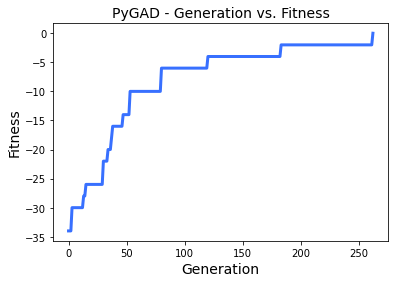

X X X X X X X Q X X X X X X X X X X X X X X X X X X X X X X
X X X X X X X X X X X X X X X X X X Q X X X X X X X X X X X
X X X X Q X X X X X X X X X X X X X X X X X X X X X X X X X
X X X X X X X X X X X X X X X X X X X X X X X X X X Q X X X
X X X X X X X X X X X X Q X X X X X X X X X X X X X X X X X
X X X X X X X X X X X X X X X X X X X X X X X X X X X Q X X
X X X X X X Q X X X X X X X X X X X X X X X X X X X X X X X
X X X X X X X X X X Q X X X X X X X X X X X X X X X X X X X
X X Q X X X X X X X X X X X X X X X X X X X X X X X X X X X
X X X X X X X X X X X X X X X X X X X X X X X X X X X X X Q
X Q X X X X X X X X X X X X X X X X X X X X X X X X X X X X
X X X X X X X X X X X X X X X X X X X X X X Q X X X X X X X
X X X X X X X X X X X X X Q X X X X X X X X X X X X X X X X
X X X X X X X X X X X X X X X X X Q X X X X X X X X X X X X
X X X X X X X X X X X X X X X X X X X X Q X X X X X X X X X
Q X X X X X X X X X X X X X X X X X X X X X X X X X X X X X
X X X X X X X X X X X Q X X X X X X X X 

In [114]:
find_solution2(30, 500, 300, 1000, 30, 1.5)

Parameters of the best solution : [14. 24.  3. 21. 23. 31. 17. 27.  5.  7.  1. 11. 18. 35. 19. 36.  2. 25.
  8. 26. 37. 33. 38.  6. 13. 10. 39. 22. 16. 32. 34. 12.  9. 29.  4. 28.
 20. 15. 30.  0.]
Fitness value of the best solution = 0


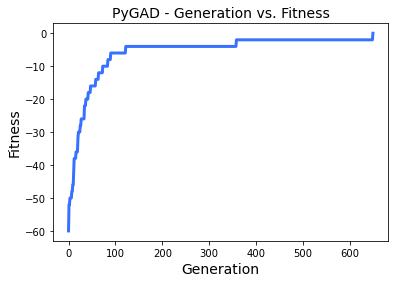

X X X X X X X X X X X X X X Q X X X X X X X X X X X X X X X X X X X X X X X X X
X X X X X X X X X X X X X X X X X X X X X X X X Q X X X X X X X X X X X X X X X
X X X Q X X X X X X X X X X X X X X X X X X X X X X X X X X X X X X X X X X X X
X X X X X X X X X X X X X X X X X X X X X Q X X X X X X X X X X X X X X X X X X
X X X X X X X X X X X X X X X X X X X X X X X Q X X X X X X X X X X X X X X X X
X X X X X X X X X X X X X X X X X X X X X X X X X X X X X X X Q X X X X X X X X
X X X X X X X X X X X X X X X X X Q X X X X X X X X X X X X X X X X X X X X X X
X X X X X X X X X X X X X X X X X X X X X X X X X X X Q X X X X X X X X X X X X
X X X X X Q X X X X X X X X X X X X X X X X X X X X X X X X X X X X X X X X X X
X X X X X X X Q X X X X X X X X X X X X X X X X X X X X X X X X X X X X X X X X
X Q X X X X X X X X X X X X X X X X X X X X X X X X X X X X X X X X X X X X X X
X X X X X X X X X X X Q X X X X X X X X X X X X X X X X X X X X X X X X X X X X
X X X X X X X X X X X X X X X X X X Q X 

In [147]:
find_solution2(40, 500, 300, 1000, 30, 1.5)

#### Bibliografia:

https://pygad.readthedocs.io/en/latest/

https://en.wikipedia.org/wiki/Eight_queens_puzzle